
⚙️ Model: XGBoost


/Users/dantetrabassi/Desktop/Prodromal_Parkinson/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:18:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dantetrabassi/Desktop/Prodromal_Parkinson/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:18:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dantetrabassi/Desktop/Prodromal_Parkinson/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:18:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dantetrabassi/Desktop/Prodromal_Parkinson/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning:


⚙️ Model: GradientBoosting

⚙️ Model: RandomForest

⚙️ Model: DecisionTree

⚙️ Model: KNN

⚙️ Model: NaiveBayes

⚙️ Model: SVC

📊 Risultati classificazione:

           Model  Accuracy  F1_class_0  F1_class_10  F1_class_11  F1_class_100  F1_class_101  F1_class_110  F1_class_111  F1_class_1001  F1_class_1011  F1_class_1100  F1_class_1101  F1_class_1110  F1_class_1111
    RandomForest  0.608365    0.506667     0.514286     0.341463      0.554217      0.627907      0.700000      0.358209       0.760870       0.815789       0.824742       0.681818       0.681818       0.382353
         XGBoost  0.558935    0.419753     0.430380     0.298851      0.394737      0.520548      0.738095      0.311688       0.735632       0.750000       0.894118       0.711111       0.592593       0.388889
GradientBoosting  0.545627    0.473684     0.372093     0.252632      0.435897      0.560000      0.682927      0.354430       0.738095       0.734177       0.823529       0.658537       0.640000       0.3947

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_37542/3831960867.py:74: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/dantetrabassi/Desktop/Prodromal_Parkinson/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


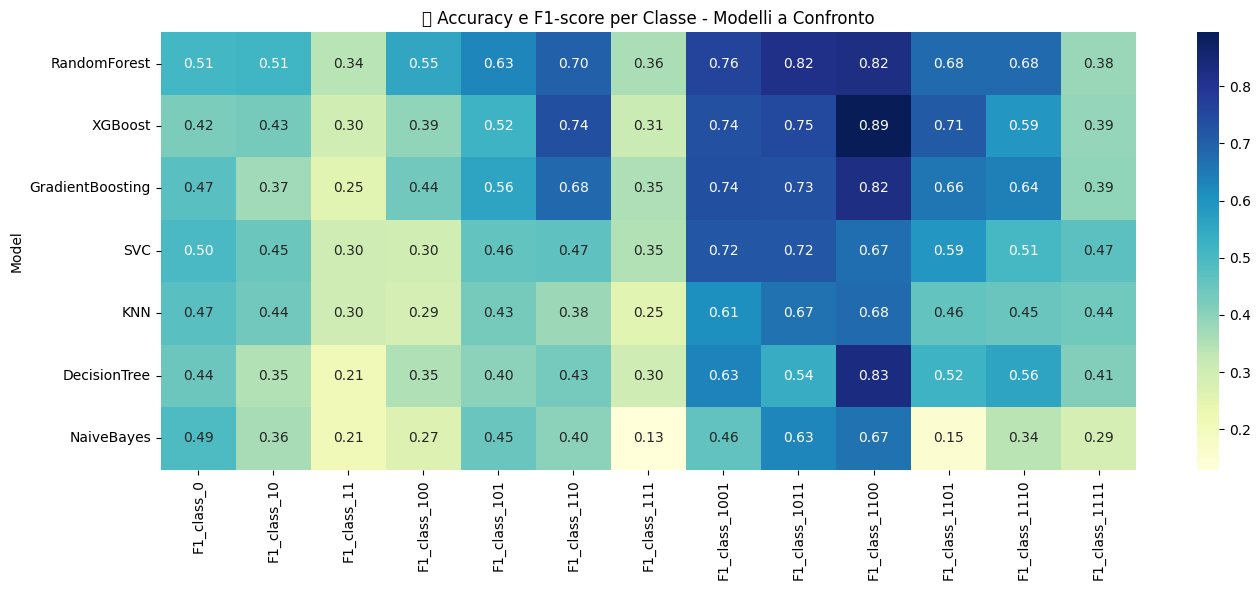

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Classificatori selezionati
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 1. Carica il dataset
df = pd.read_csv("../data/prodromi_ctgan_final.csv")
X = df.drop(columns=['prodromi_combo'])
y_raw = df['prodromi_combo']

# 2. Mapping delle etichette in classi numeriche
class_map = {label: idx for idx, label in enumerate(sorted(y_raw.unique()))}
inv_class_map = {v: k for k, v in class_map.items()}
y = y_raw.map(class_map)

# 3. Preprocessing
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
X_preprocessed = pipeline.fit_transform(X)

# 4. Modelli selezionati
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "GradientBoosting": GradientBoostingClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "DecisionTree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "SVC": SVC()
}

# 5. Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    print(f"\n⚙️ Model: {name}")
    y_pred = cross_val_predict(model, X_preprocessed, y, cv=skf)
    acc = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred, output_dict=True, zero_division=0)

    row = {"Model": name, "Accuracy": acc}
    for cls_idx in sorted(class_map.values()):
        f1_cls = report[str(cls_idx)]['f1-score']
        prodromi_label = inv_class_map[cls_idx]
        row[f"F1_class_{prodromi_label}"] = f1_cls
    results.append(row)

# 6. Visualizzazione risultati
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n📊 Risultati classificazione:\n")
print(results_df.to_string(index=False))

# 7. Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.heatmap(results_df.set_index("Model").iloc[:, 1:], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("📈 Accuracy e F1-score per Classe - Modelli a Confronto")
plt.tight_layout()
plt.show()

| Codice Decimale | Codice Binario | Hyposmia | Constipation | REM Sleep Disorder | Depression |
| --------------- | -------------- | -------- | ------------ | ------------------ | ---------- |
| 0               | `0000`         | ❌        | ❌            | ❌                  | ❌          |
| 1               | `0001`         | ❌        | ❌            | ❌                  | ✅          |
| 2               | `0010`         | ❌        | ❌            | ✅                  | ❌          |
| 3               | `0011`         | ❌        | ❌            | ✅                  | ✅          |
| 4               | `0100`         | ❌        | ✅            | ❌                  | ❌          |
| 5               | `0101`         | ❌        | ✅            | ❌                  | ✅          |
| 6               | `0110`         | ❌        | ✅            | ✅                  | ❌          |
| 7               | `0111`         | ❌        | ✅            | ✅                  | ✅          |
| 8               | `1000`         | ✅        | ❌            | ❌                  | ❌          |
| 9               | `1001`         | ✅        | ❌            | ❌                  | ✅          |
| 10              | `1010`         | ✅        | ❌            | ✅                  | ❌          |
| 11              | `1011`         | ✅        | ❌            | ✅                  | ✅          |
| 12              | `1100`         | ✅        | ✅            | ❌                  | ❌          |
| 13              | `1101`         | ✅        | ✅            | ❌                  | ✅          |
| 14              | `1110`         | ✅        | ✅            | ✅                  | ❌          |
| 15              | `1111`         | ✅        | ✅            | ✅                  | ✅          |

🥇 Classe meglio classificata
# Classe 1100 (F1 = 0.894, XGBoost) Hyposmia + Constipation

Seguita da:

# Classe 1011 (0.816, RF) Hyposmia + REM + Depression

101 (0.628, RF)

1001 (0.761, RF)